# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** David Timothy Mewengkang
- **Email:** timothymewengkang@gmail.com

## Menentukan Pertanyaan Bisnis


1. **Bagaimana tren popularitas musik berdasarkan waktu?**

2. **Apa Hubungan Danceability dan Popularitas Musik?**

3. **Bagaimana distribusi BPM musik pada dataset ini?**

4. **Bagaimana perbandingan jumlah playlist antara platform Spotify, Apple Music, dan Deezer?**

5. **Apa korelasi antar variabel yang ada dalam data musik ini?**

6. **Bagaimana distribusi jumlah streaming pada musik yang ada?**

7. **Apa saja 10 lagu atau artis teratas berdasarkan jumlah streaming?**

8. **Bagaimana hubungan antara popularitas lagu dan tanggal rilisnya?**


## Import Semua Packages/Library yang Digunakan

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Data Wrangling

### Gathering Data

In [19]:
df = pd.read_csv("Spotify Most Streamed Songs.csv", delimiter=",")

In [20]:
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


Pada tahap ini, saya mengumpulkan dan memuat semua dataFrame yang dibutuhkan. Setelah itu, saya menampilkan 5 baris pertama pada setiap DataFrame. Kodenya seperti di atas ini.

**Insight:**
- Mendapatkan gambaran singkat mengenai isi pada setiap DataFrame yang ada

### Assessing Data

In [21]:
print(f"DATAFRAME INFO:")
print(df.info())
print("-" * 50)
print(f"DATAFRAME STATISTICS:")
print(df.describe())
print("-" * 50)
print(f"Jumlah duplikasi: {df.duplicated().sum()}")
print("-" * 50)
print(f"Missing Values Count:")
print(df.isna().sum())
print("=" * 100)

DATAFRAME INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   85

**Insight:**
- ...

### Cleaning Data

Pada proses kali ini, saya akan melakukan pembersihan data sebelum melakukan analisa lebih lanjut. 

**1. Memperbaiki tipe data yang tidak Sesuai**

In [23]:
df.drop(index=574, inplace=True)
df['streams'] = pd.to_numeric(df['streams'])
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'].str.replace(',', ''))
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            951 non-null    object 
 1   artist(s)_name        951 non-null    object 
 2   artist_count          951 non-null    int64  
 3   released_year         951 non-null    int64  
 4   released_month        951 non-null    int64  
 5   released_day          951 non-null    int64  
 6   in_spotify_playlists  951 non-null    int64  
 7   in_spotify_charts     951 non-null    int64  
 8   streams               951 non-null    int64  
 9   in_apple_playlists    951 non-null    int64  
 10  in_apple_charts       951 non-null    int64  
 11  in_deezer_playlists   951 non-null    int64  
 12  in_deezer_charts      951 non-null    int64  
 13  in_shazam_charts      894 non-null    float64
 14  bpm                   951 non-null    int64  
 15  key                   856 no

**2. Missing Values di kolom in_shazam_charts**

Menghapus missing values 

In [24]:
df.dropna(subset=['in_shazam_charts'], axis=0, inplace=True)
print(df.isna().sum())


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     83
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
cover_url                0
dtype: int64


**Insight:**
- **Setelah Memasukan Nilai:** Sudah tidak ada missing value di kolom in_shazam_charts, tetapi masih ada missing value di kolom lain. Namun, karena kolom yang kosong tersebut tidak ada hubungannya dengan analisa yang akan saya lakukan, maka saya akan mengabaikan missing value tersebut. 

## Visualization & Explanatory Analysis

### 1. Tren Popularitas Berdasarkan Waktu

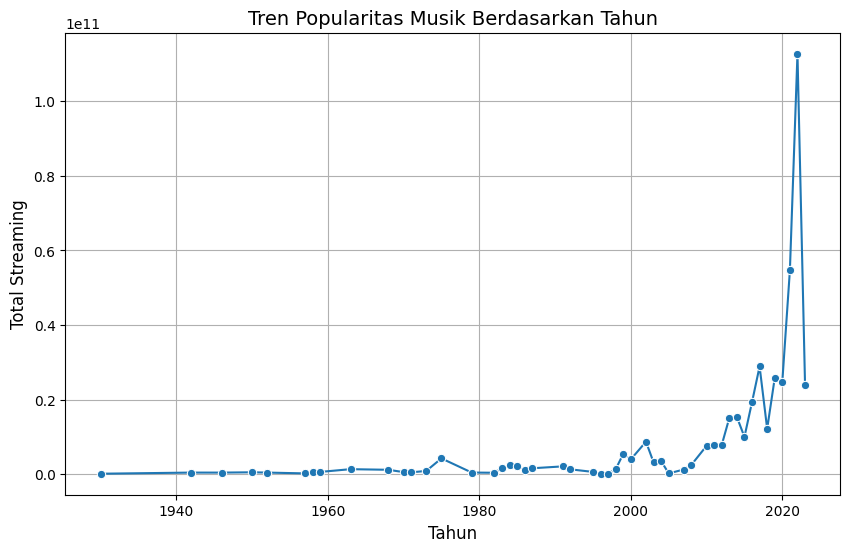

In [33]:
yearly_trends = df.groupby('released_year')['streams'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trends, x='released_year', y='streams', marker='o')
plt.title('Tren Popularitas Musik Berdasarkan Tahun', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Total Streaming', fontsize=12)
plt.grid(True)
plt.show()


### 2. Hubungan Danceability dan Popularitas Musik

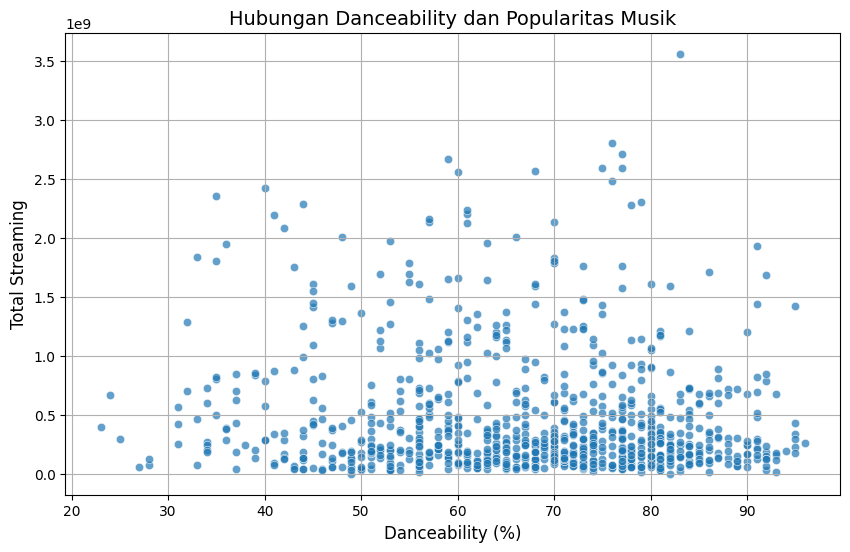

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='danceability_%', y='streams', alpha=0.7)
plt.title('Hubungan Danceability dan Popularitas Musik', fontsize=14)
plt.xlabel('Danceability (%)', fontsize=12)
plt.ylabel('Total Streaming', fontsize=12)
plt.grid(True)
plt.show()


### 3. Distribusi BPM Musik

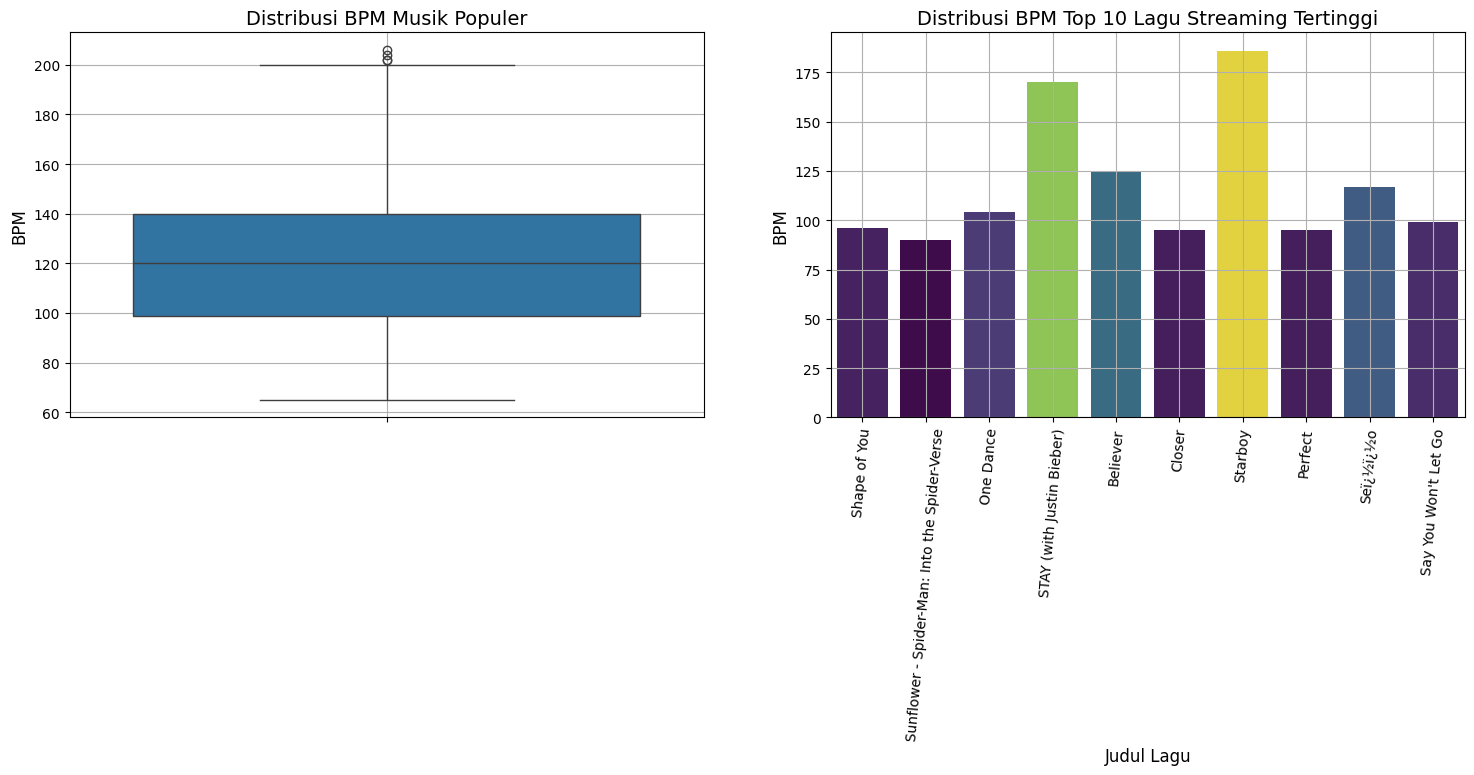

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5)) 

sns.boxplot(data=df, y='bpm', ax=axes[0]) 
axes[0].set_title('Distribusi BPM Musik Populer', fontsize=14)
axes[0].set_ylabel('BPM', fontsize=12)
axes[0].grid(True)

top_songs = df.nlargest(10, 'streams')

sns.barplot(data=top_songs, x='track_name', y='bpm', hue='bpm', palette='viridis', legend=False, ax=axes[1]) 
axes[1].set_title('Distribusi BPM Top 10 Lagu Streaming Tertinggi', fontsize=14)
axes[1].tick_params(axis='x', rotation=85) 
axes[1].set_xlabel('Judul Lagu', fontsize=12)
axes[1].set_ylabel('BPM', fontsize=12)
axes[1].grid(True)

plt.show()


- Melihat sebaran BPM: Apakah lebih banyak lagu dengan BPM rendah atau tinggi?
- Identifikasi tren BPM: Misalnya, apakah musik populer dalam beberapa tahun terakhir cenderung lebih cepat atau lebih lambat?
- Menilai variasi BPM: Seberapa besar variasi dalam BPM di kalangan lagu-lagu populer?

### 4. Perbandingan Platform berdasarkan jumlah playlist

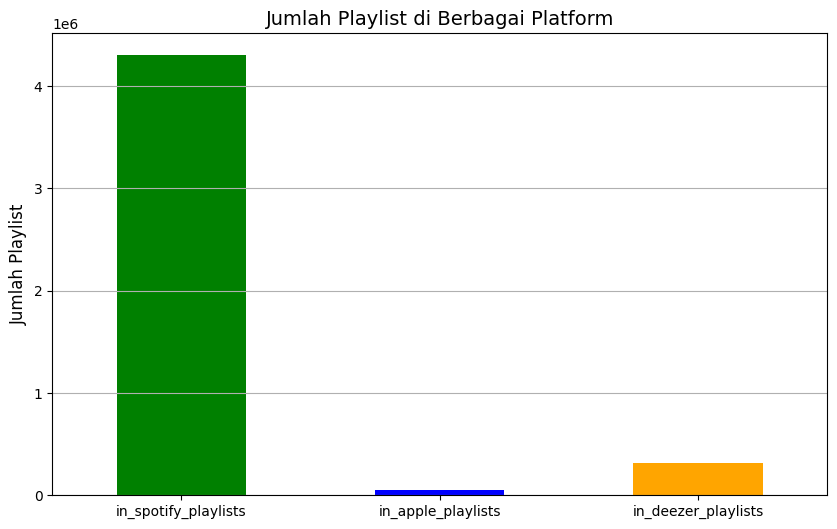

In [ ]:
platform_data = df[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum()

plt.figure(figsize=(10, 6))
platform_data.plot(kind='bar', color=['green', 'blue', 'orange'])
plt.title('Jumlah Playlist di Berbagai Platform', fontsize=14)
plt.ylabel('Jumlah Playlist', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.show()


### 5. Korelasi Antar Kolom

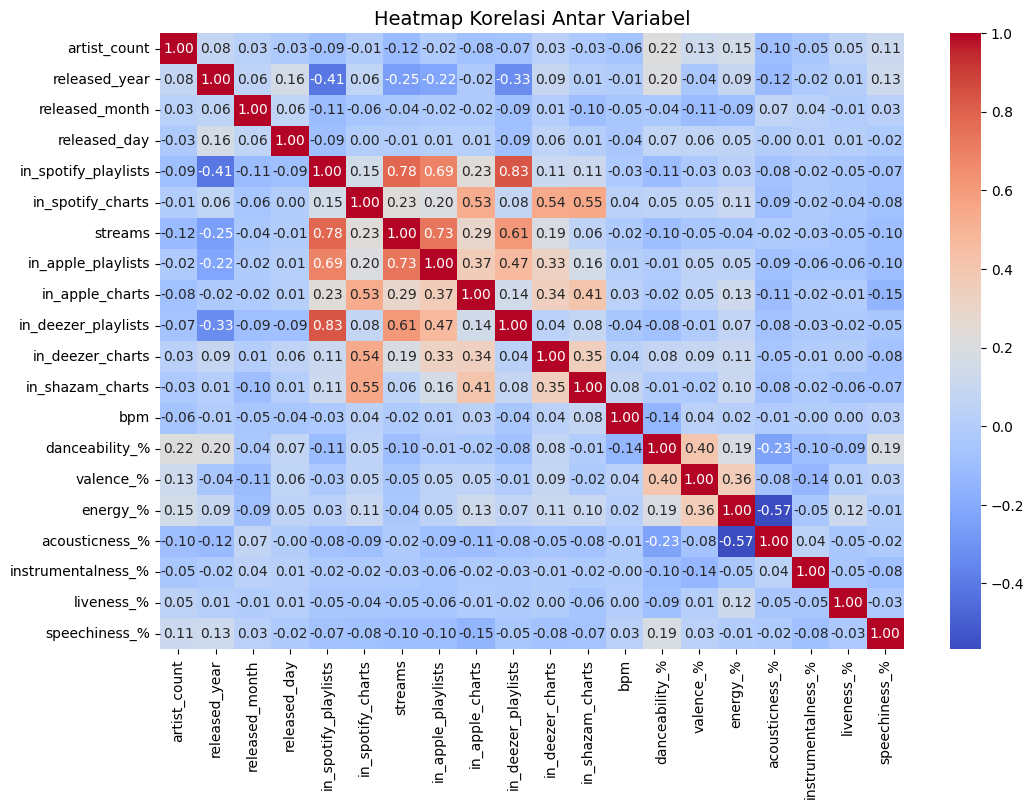

In [39]:
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi Antar Variabel', fontsize=14)
plt.show()

### 6. Distribusi Jumlah Streaming

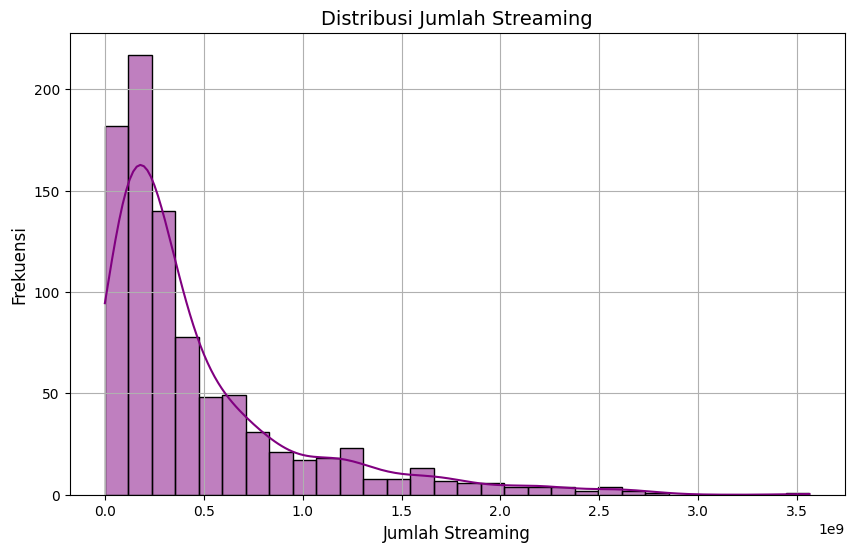

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['streams'], bins=30, kde=True, color='purple')
plt.title('Distribusi Jumlah Streaming', fontsize=14)
plt.xlabel('Jumlah Streaming', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(True)
plt.show()


**Kesimpulan**

Lebih banyak lagu dengan sedikit streaming. Hal ini tercermin dari fakta bahwa lebih banyak lagu-lagu dengan streaming rendah (ditunjukkan pada frekuensi (jumlah lagu) yang jauh lebih tinggi) dibandingkan dengan lagu-lagu yang memiliki streaming tinggi (ditunjukkan pada frekuensi (jumlah lagu) yang jauh lebih rendah).

### 7. Top 10 Lagu

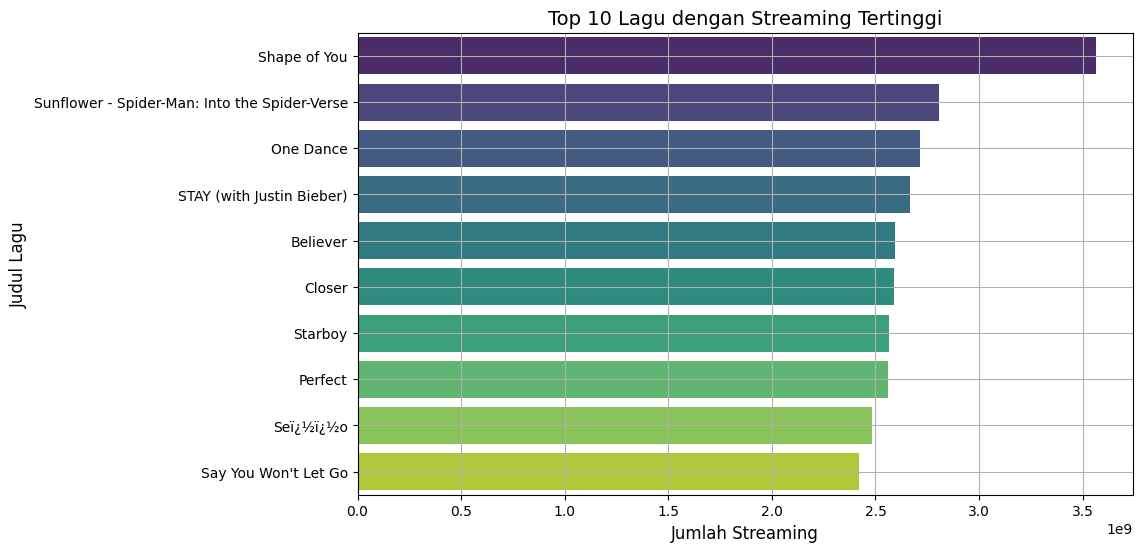

In [48]:
top_songs = df.nlargest(10, 'streams')

plt.figure(figsize=(10, 6))
sns.barplot(data=top_songs, x='streams', y='track_name', hue='track_name', palette='viridis',legend=False)
plt.title('Top 10 Lagu dengan Streaming Tertinggi', fontsize=14)
plt.xlabel('Jumlah Streaming', fontsize=12)
plt.ylabel('Judul Lagu', fontsize=12)
plt.grid(True)
plt.show()


### 8. Hubungan Popularitas dan Tanggal Rilis

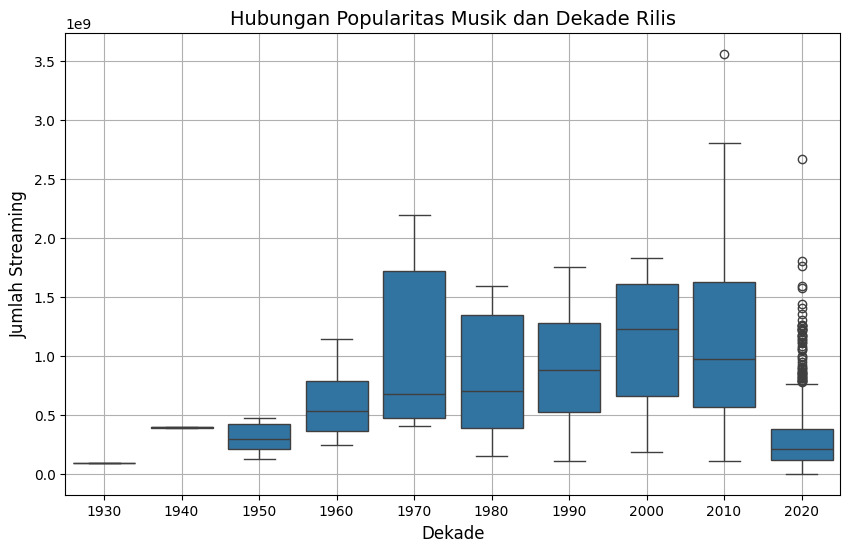

In [49]:
df['decade'] = (df['released_year'] // 10) * 10

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='decade', y='streams')
plt.title('Hubungan Popularitas Musik dan Dekade Rilis', fontsize=14)
plt.xlabel('Dekade', fontsize=12)
plt.ylabel('Jumlah Streaming', fontsize=12)
plt.grid(True)
plt.show()


## Conclusion

....